<a href="https://colab.research.google.com/github/stephanefschwarz/Hough-Transform/blob/master/HoughTransform.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from skimage.transform import rotate
from skimage.transform import (hough_line, hough_line_peaks)
from scipy.stats import mode
from skimage import io
from skimage.filters import threshold_otsu, sobel
from matplotlib import cm

In [8]:
def binarizeImage(RGB_image):

  image = rgb2gray(RGB_image)
  threshold = threshold_otsu(image)
  bina_image = image < threshold
  
  return bina_image

def findEdges(bina_image):
  
  image_edges = sobel(bina_image)

  plt.imshow(bina_image, cmap='gray')
  plt.axis('off')
  plt.title('Binary Image Edges')
  plt.savefig('/content/drive/My Drive/binary_image.png')

  return image_edges

def findTiltAngle(image_edges):
  
  h, theta, d = hough_line(image_edges)
  accum, angles, dists = hough_line_peaks(h, theta, d)
  angle = np.rad2deg(mode(angles)[0][0])
  
  if (angle < 0):
    
    r_angle = angle + 90
    
  else:
    
    r_angle = angle - 90

  # Plot Image and Lines    
  fig, ax = plt.subplots()
  

  ax.imshow(image_edges, cmap='gray')

  origin = np.array((0, image_edges.shape[1]))

  for _, angle, dist in zip(*hough_line_peaks(h, theta, d)):

    y0, y1 = (dist - origin * np.cos(angle)) / np.sin(angle)
    ax.plot(origin, (y0, y1), '-r')

  ax.set_xlim(origin)
  ax.set_ylim((image_edges.shape[0], 0))
  ax.set_axis_off()
  ax.set_title('Detected lines')

  plt.savefig('/content/drive/My Drive/hough_lines.png')

  plt.show()
    
  return r_angle

  
def rotateImage(RGB_image, angle):

  fixed_image = rotate(RGB_image, angle)

  plt.imshow(fixed_image)
  plt.axis('off')
  plt.title('Fixed Image')
  plt.savefig('/content/drive/My Drive/fixed_image.png')
  plt.show()

  return fixed_image

def generalPipeline():

  img = '/content/drive/My Drive/cnh.png'

  image = io.imread(img)
  bina_image = binarizeImage(image)
  image_edges = findEdges(bina_image)
  angle = findTiltAngle(image_edges)
  rotateImage(io.imread(img), angle)

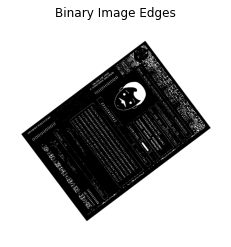

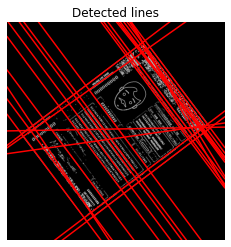

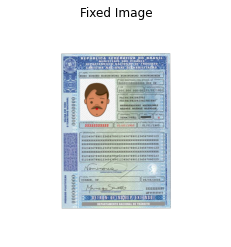

In [9]:
generalPipeline()